In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Hotels_data.csv',encoding_errors = 'ignore')
df.head()

,hotel_name,location,features,ratings,reviews,review_title,room_style,price,tax_charges,city,duration,persons,cancellation_policy,pre_payment,breakfast_included,Beds,Rooms
0,Candolim Serenity Resort - Top Rated & Most Aw...,Old Goa,Double Room1 double bedFree cancellationNo pre...,7.4,12.0,Good,Double Room,39060,"3 nights, 2 adults",Goa,3,2,Yes,No,No,one double bed,two bedrooms
1,"Hotel Golden Rice Sarenity With Swimming Pool,...",Aguada,Deluxe Room1 double bedFree cancellation,6.7,55.0,Good,Deluxe Room,47811,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room
2,Ronnie's Studio Apartment,Saligao,Apartment with BalconyEntire apartment 1 bedr...,7.9,123.0,Good,Apartment with Balcony,34097,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,NaN,one bedroom
3,La Vera Boutique Hotel,Mandrem,Standard King Room1 extra-large double bedFree...,8.0,218.0,Very good,Standard King Room,37725,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one extra-large double bed,King Room
4,"The Golden Wings Resort, Goa - Property of the...",Aguada,Deluxe Room1 double bedFree cancellationOnly 3...,6.1,7.0,Good,Deluxe Room,40497,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room


In [3]:
df.columns

Index(['hotel_name', 'location', 'features', 'ratings', 'reviews',
       'review_title', 'room_style', 'price', 'tax_charges', 'city',
       'duration', 'persons', 'cancellation_policy', 'pre_payment',
       'breakfast_included', 'Beds', 'Rooms'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['hotel_name', 'location', 'features', 'ratings', 'reviews',
       'review_title', 'room_style', 'price', 'tax_charges', 'city',
       'duration', 'persons', 'cancellation_policy', 'pre_payment',
       'breakfast_included', 'beds', 'rooms'],
      dtype='object')

In [5]:
#df = df.drop('Beds', axis=1)

In [6]:
#df = df.drop('Rooms', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269 entries, 0 to 2268
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel_name           2269 non-null   object 
 1   location             2269 non-null   object 
 2   features             2269 non-null   object 
 3   ratings              1860 non-null   float64
 4   reviews              1860 non-null   float64
 5   review_title         1860 non-null   object 
 6   room_style           2269 non-null   object 
 7   price                2269 non-null   int64  
 8   tax_charges          2269 non-null   object 
 9   city                 2269 non-null   object 
 10  duration             2269 non-null   int64  
 11  persons              2269 non-null   int64  
 12  cancellation_policy  2269 non-null   object 
 13  pre_payment          2269 non-null   object 
 14  breakfast_included   2269 non-null   object 
 15  beds                 1698 non-null   o

In [8]:
df.shape

(2269, 17)

In [9]:
df.isnull().sum()

hotel_name               0
location                 0
features                 0
ratings                409
reviews                409
review_title           409
room_style               0
price                    0
tax_charges              0
city                     0
duration                 0
persons                  0
cancellation_policy      0
pre_payment              0
breakfast_included       0
beds                   571
rooms                  154
dtype: int64

In [10]:
df.beds = df.beds.replace(' ',np.nan).astype(object)
df.beds.dtype

dtype('O')

In [11]:
df.rooms = df.rooms.replace(' ',np.nan).astype(object)
df.rooms.dtype

dtype('O')

In [12]:
df = df.dropna()
df.head()

,hotel_name,location,features,ratings,reviews,review_title,room_style,price,tax_charges,city,duration,persons,cancellation_policy,pre_payment,breakfast_included,beds,rooms
0,Candolim Serenity Resort - Top Rated & Most Aw...,Old Goa,Double Room1 double bedFree cancellationNo pre...,7.4,12.0,Good,Double Room,39060,"3 nights, 2 adults",Goa,3,2,Yes,No,No,one double bed,two bedrooms
1,"Hotel Golden Rice Sarenity With Swimming Pool,...",Aguada,Deluxe Room1 double bedFree cancellation,6.7,55.0,Good,Deluxe Room,47811,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room
3,La Vera Boutique Hotel,Mandrem,Standard King Room1 extra-large double bedFree...,8.0,218.0,Very good,Standard King Room,37725,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one extra-large double bed,King Room
4,"The Golden Wings Resort, Goa - Property of the...",Aguada,Deluxe Room1 double bedFree cancellationOnly 3...,6.1,7.0,Good,Deluxe Room,40497,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room
5,Hotel Shivam INN - 1 km from calangute Beach,Verla,King Room1 double bedFree cancellationNo prepa...,10.0,3.0,Exceptional,King Room,22498,"3 nights, 2 adults",Goa,3,2,Yes,No,No,one double bed,King Room


In [13]:
df.shape

(1300, 17)

In [14]:
df[df.duplicated()]

,hotel_name,location,features,ratings,reviews,review_title,room_style,price,tax_charges,city,duration,persons,cancellation_policy,pre_payment,breakfast_included,beds,rooms


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 2261
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel_name           1300 non-null   object 
 1   location             1300 non-null   object 
 2   features             1300 non-null   object 
 3   ratings              1300 non-null   float64
 4   reviews              1300 non-null   float64
 5   review_title         1300 non-null   object 
 6   room_style           1300 non-null   object 
 7   price                1300 non-null   int64  
 8   tax_charges          1300 non-null   object 
 9   city                 1300 non-null   object 
 10  duration             1300 non-null   int64  
 11  persons              1300 non-null   int64  
 12  cancellation_policy  1300 non-null   object 
 13  pre_payment          1300 non-null   object 
 14  breakfast_included   1300 non-null   object 
 15  beds                 1300 non-null   o

In [16]:
df.columns

Index(['hotel_name', 'location', 'features', 'ratings', 'reviews',
       'review_title', 'room_style', 'price', 'tax_charges', 'city',
       'duration', 'persons', 'cancellation_policy', 'pre_payment',
       'breakfast_included', 'beds', 'rooms'],
      dtype='object')

In [17]:
df.rename(columns={'tax_charges' : 'stay & Capacity','duration' : 'stay','persons' : 'capacity'}, inplace=True)

### non visualization analysis

In [18]:
categorical_columns = ['hotel_name','location','review_title','room_style','city','cancellation_policy','pre_payment','stay','capacity','breakfast_included','beds','rooms']

numerical_columns = ['ratings','reviews','price']

In [19]:
def categorical_data(data):
    for col in data:
        print('*'*20, col, '*'*20,'\n')
        print(data[col].agg(['count','unique','nunique']))
        print(data[col].value_counts())
        print()

# Numerical data
def numerical_data(data):
    for col in data:
        print('*'*20, col, '*'*20, '\n')
        print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()

In [20]:
categorical_data(df[categorical_columns])

******************** hotel_name ******************** 

count                                                   1300
unique     [Candolim Serenity Resort - Top Rated & Most A...
nunique                                                 1274
Name: hotel_name, dtype: object
Woods IN Manali                                                        2
Hotel Mid town                                                         2
Hotel OVO Residency Near Masjid Bunder Railway Station                 2
Astropods                                                              2
FabHotel Arc Palace                                                    2
                                                                      ..
Calangute Heights by Stay ALYF - Luxury 1 BHK Apartments, Calangute    1
Whoopers Home Palolem                                                  1
Flora Villa Guest House Candolim Beach                                 1
Hotel Meraden Opus                                                     1


In [21]:
numerical_data(df[numerical_columns])

******************** ratings ******************** 

count     1300.000000
min          1.000000
max         10.000000
mean         7.200615
median       7.500000
std          1.988458
skew        -1.079096
kurt         1.240686
Name: ratings, dtype: float64

******************** reviews ******************** 

count     1300.000000
min          1.000000
max       4913.000000
mean       129.650000
median      30.000000
std        332.966030
skew         7.141221
kurt        71.120978
Name: reviews, dtype: float64

******************** price ******************** 

count       1300.000000
min         1458.000000
max       299997.000000
mean       22951.828462
median     15000.000000
std        26184.107964
skew           3.883303
kurt          23.200810
Name: price, dtype: float64



### Univariate Analysis

In [22]:
categorical_columns = ['hotel_name','location','review_title','room_style','city','cancellation_policy','pre_payment','duration','persons','breakfast_included','beds','rooms']

numerical_columns = ['ratings','reviews','price']

In [23]:
def discrete_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of discrete data (categorical and numerical).
    '''
    for col in data:
        fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
        fig.suptitle("Discrete Distribution")
        
        ax.set_title(col)
        sns.countplot(x=data[col], ax=ax)
        
        plt.xticks(rotation=45)
        plt.show()


# Numerical
def continuous_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of continuous numerical data.
    '''

    fig, axes = plt.subplots(figsize=(8, 3), constrained_layout=True)
    fig.suptitle("Continuous Distribution")
    
    axes[0].set_title("Histogram Plot")
    sns.histplot(data, ax=axes[0], kde=True)
    
    axes[1].set_title("KDE Plot")
    sns.kdeplot(data, fill=True, ax=axes[1])

    axes[2].set_title("Box Plot")
    sns.boxplot(data, ax=axes[2])

    plt.show()

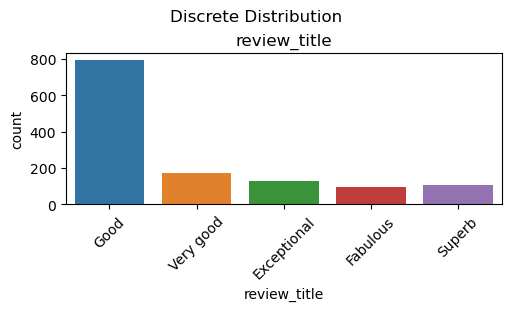

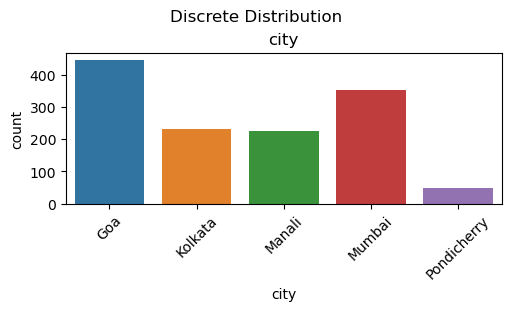

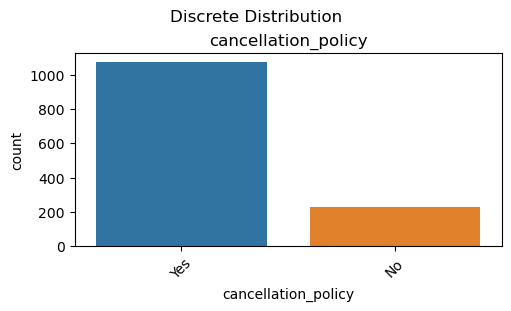

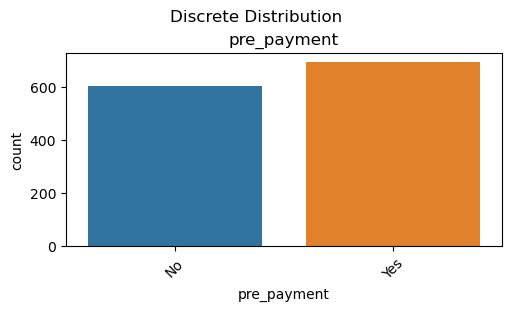

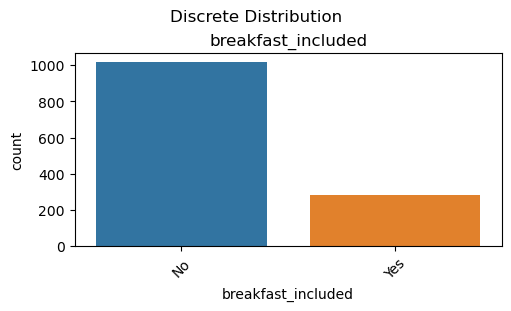

In [24]:
discrete_viz_analysis(data=df[['review_title','city','cancellation_policy','pre_payment','breakfast_included']])

In [25]:
cities=df.groupby('city')
goa = cities.get_group('Goa')
manali=cities.get_group('Manali')
mumbai=cities.get_group('Mumbai')
kolkata=cities.get_group('Kolkata')
pondicherry=cities.get_group('Pondicherry')


In [26]:
cit = ['goa','manali','mumbai','kolkata','pondicherry']

In [27]:
categorical_data(goa)

******************** hotel_name ******************** 

count                                                    445
unique     [Candolim Serenity Resort - Top Rated & Most A...
nunique                                                  439
Name: hotel_name, dtype: object
Santa Monica Resort - Calangute             2
The Golden Rice by The Four Seasons, Goa    2
Itsy By Treebo - Raj Resort                 2
Sia Signature Calangute                     2
HOTEL GOLDEN RICE, Goa                      2
                                           ..
The House Of Brothers                       1
Gods gift guesthouse                        1
Heritage Exotica Villa - 4BHK, Baga         1
Sea 2000 Resort                             1
Iora Baga Beach                             1
Name: hotel_name, Length: 439, dtype: int64

******************** location ******************** 

count                                                    445
unique     [Old Goa, Aguada, Mandrem, Verla, Moira, Curto...
nuni

In [28]:
numerical_data(goa)

******************** hotel_name ******************** 

count                                                  445
min      1Bhk Apartment in Luxury Resort,Benaulim south...
max                                ibis Styles Goa Vagator
Name: hotel_name, dtype: object

******************** location ******************** 

count           445
min        Agarvado
max      Vichondrem
Name: location, dtype: object

******************** features ******************** 

count                                                  445
min      (Sanitised) Superior Double Room1 double bedFr...
max      [Sanitized] Standard Double Room1 large double...
Name: features, dtype: object

******************** ratings ******************** 

count     445.000000
min         1.000000
max        10.000000
mean        7.591685
median      7.800000
std         1.546428
skew       -1.392895
kurt        3.548265
Name: ratings, dtype: float64

******************** reviews ******************** 

count      445.000000
min  

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  

In [29]:
categorical_data(manali)

******************** hotel_name ******************** 

count                                                    225
unique     [Hotel New Meadows inn, Manali Castle - Hotel ...
nunique                                                  219
Name: hotel_name, dtype: object
Montana Blues Resort by Snow City                                                                 2
HIGH MOUNTAINS BY HADIMBA PALACE                                                                  2
Banon Resorts                                                                                     2
The Dafodil - A Boutique Hotel                                                                    2
Woods IN Manali                                                                                   2
                                                                                                 ..
Rangri Homestead - A Boutique Homestay Cottage                                                    1
Hill -Top Home stay           

In [30]:
categorical_data(mumbai)

******************** hotel_name ******************** 

count                                                    351
unique     [Trident Bandra Kurla, Country Inn By Turtle H...
nunique                                                  343
Name: hotel_name, dtype: object
Hotel Mid town                                         2
Treebo Trend Laaiba Residency                          2
FabHotel Glorify Palace                                2
Astropods                                              2
FabHotel Arc Palace                                    2
                                                      ..
FabHotel Aksa International Andheri East               1
Hotel Plaza Executive - near BKC                       1
Hotel Royal Residency                                  1
Gulf Hotel Mumbai- The Boutique Hotel Colaba Mumbai    1
Mayura Aureole CoLiving                                1
Name: hotel_name, Length: 343, dtype: int64

******************** location ******************** 

count

In [31]:
categorical_data(kolkata)

******************** hotel_name ******************** 

count                                                    230
unique     [FabHotel Sayeeda International, FabHotel Stay...
nunique                                                  226
Name: hotel_name, dtype: object
FabHotel Dream Plaza                                          2
FabHotel New kolkata Residency Inn                            2
FabHotel Aqua Tulip                                           2
Treebo Trend Sreema - 8 Km Away From Eden Gardens, Kolkata    2
FabHotel Sayeeda International                                1
                                                             ..
The Opus Kolkata - A Boutique Hotel                           1
Regenta Orkos Kolkata by Royal Orchid Hotels Limited          1
Hotel Pan Asia International                                  1
Sterling Baishakhi                                            1
FabHotel Royal Palm                                           1
Name: hotel_name, Length: 

In [32]:
categorical_data(pondicherry)

******************** hotel_name ******************** 

count                                                     49
unique     [Dune de L'orient, Pranaav Beach Resort, White...
nunique                                                   48
Name: hotel_name, dtype: object
Treebo Trend Grace Inn Pondicherry                                        2
Dune de L'orient                                                          1
Thendralhomestay                                                          1
VSR HOME STAY                                                             1
La Grace Integral Retreat                                                 1
OYO Flagship 70256 White Town Residency                                   1
OYO Flagship Seashore Residency                                           1
Hotel Jothimani                                                           1
OYO Flagship Palacial Pondi                                               1
Cottages and Private Pool Villas by Queens Par

In [33]:
numerical_data(manali)

******************** hotel_name ******************** 

count                                                  225
min      1 BHK INDEPENDENT MUD HOUSE WITH NETFLIX, POWE...
max                  juSTa Grand View Resort & Spa, Manali
Name: hotel_name, dtype: object

******************** location ******************** 

count                   225
min            Aleo, Manali
max      Old Manali, Manali
Name: location, dtype: object

******************** features ******************** 

count                                                  225
min       Super Deluxe Room1 double bedBreakfast includ...
max      VillaEntire villa  1 bedroom  2 bathrooms  23m...
Name: features, dtype: object

******************** ratings ******************** 

count     225.000000
min         1.000000
max        10.000000
mean        8.454667
median      8.900000
std         1.719476
skew       -2.393354
kurt        7.183397
Name: ratings, dtype: float64

******************** reviews ******************** 

cou

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  

In [34]:
numerical_data(mumbai)

******************** hotel_name ******************** 

count                                                  351
min      5 - Studio Velankanni Heights, Behaind Nanavat...
max                  ibis Mumbai Vikhroli - An Accor Brand
Name: hotel_name, dtype: object

******************** location ******************** 

count                             351
min      Bandra Kurla Complex, Mumbai
max                     Worli, Mumbai
Name: location, dtype: object

******************** features ******************** 

count                                                  351
min       Luxury Room King Bed1 extra-large double bedB...
max      [Sanitized] Standard Double or Twin RoomBeds: ...
Name: features, dtype: object

******************** ratings ******************** 

count     351.000000
min         1.000000
max        10.000000
mean        6.322222
median      6.600000
std         1.952337
skew       -0.648663
kurt        0.459863
Name: ratings, dtype: float64

******************** revi

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  

In [35]:
numerical_data(kolkata)

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  

******************** hotel_name ******************** 

count               230
min              Aauris
max      laxmi homestay
Name: hotel_name, dtype: object

******************** location ******************** 

count                    230
min      Ballygunge, Kolkata
max       Salt Lake, Kolkata
Name: location, dtype: object

******************** features ******************** 

count                                                  230
min      Budget Double Room1 double bedBreakfast includ...
max      [Sanitized] Standard Twin Room2 single bedsFre...
Name: features, dtype: object

******************** ratings ******************** 

count     230.000000
min         1.000000
max        10.000000
mean        6.637391
median      7.100000
std         2.130378
skew       -0.972059
kurt        0.730823
Name: ratings, dtype: float64

******************** reviews ******************** 

count      230.000000
min          1.000000
max       1744.000000
mean       123.073913
median      20.00

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  

In [36]:
numerical_data(pondicherry)

******************** hotel_name ******************** 

count                   49
min      Accord Puducherry
max              sea house
Name: hotel_name, dtype: object

******************** location ******************** 

count                            49
min      Heritage Town, Pondicherry
max         White Town, Pondicherry
Name: location, dtype: object

******************** features ******************** 

count                                                   49
min      Budget Double Room1 double bedBreakfast includ...
max      [Sanitized] Standard Double Room1 extra-large ...
Name: features, dtype: object

******************** ratings ******************** 

count     49.000000
min        1.000000
max       10.000000
mean       6.826531
median     7.600000
std        2.354939
skew      -0.945014
kurt       0.120103
Name: ratings, dtype: float64

******************** reviews ******************** 

count      49.000000
min         1.000000
max       560.000000
mean       78.755102

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2494145969.py:12: FutureWarning: ['mean', 'median', 'std', 'skew', 'kurt'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  

### removal of outliers

In [37]:
threshold = 150000

df = df[df['price'] <= threshold]

df

,hotel_name,location,features,ratings,reviews,review_title,room_style,price,stay & Capacity,city,stay,capacity,cancellation_policy,pre_payment,breakfast_included,beds,rooms
0,Candolim Serenity Resort - Top Rated & Most Aw...,Old Goa,Double Room1 double bedFree cancellationNo pre...,7.4,12.0,Good,Double Room,39060,"3 nights, 2 adults",Goa,3,2,Yes,No,No,one double bed,two bedrooms
1,"Hotel Golden Rice Sarenity With Swimming Pool,...",Aguada,Deluxe Room1 double bedFree cancellation,6.7,55.0,Good,Deluxe Room,47811,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room
3,La Vera Boutique Hotel,Mandrem,Standard King Room1 extra-large double bedFree...,8.0,218.0,Very good,Standard King Room,37725,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one extra-large double bed,King Room
4,"The Golden Wings Resort, Goa - Property of the...",Aguada,Deluxe Room1 double bedFree cancellationOnly 3...,6.1,7.0,Good,Deluxe Room,40497,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room
5,Hotel Shivam INN - 1 km from calangute Beach,Verla,King Room1 double bedFree cancellationNo prepa...,10.0,3.0,Exceptional,King Room,22498,"3 nights, 2 adults",Goa,3,2,Yes,No,No,one double bed,King Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,Bellani Villa Maya,Pondicherry,King SuitePrivate suite 1 bedroom 1 living r...,9.0,1.0,Superb,King Suite,45000,"3 nights, 2 adults",Pondicherry,3,2,Yes,No,No,one extra-large double bed,one bedroom
2252,Jai wings,Pondicherry,Deluxe Room1 extra-large double bedOnly 4 room...,4.8,5.0,Good,Deluxe Room,18900,"3 nights, 2 adults",Pondicherry,3,2,No,Yes,No,one extra-large double bed,Deluxe Room
2253,Garrisson Stays,Pondicherry,Deluxe Double Room1 large double bedFree cance...,6.2,5.0,Good,Deluxe Double Room,22497,"3 nights, 2 adults",Pondicherry,3,2,Yes,No,No,one large double bed,two bedrooms
2258,Arunik Inn,"Heritage Town, Pondicherry",Deluxe Double Room1 large double bedFree cance...,2.0,1.0,Good,Deluxe Double Room,37000,"3 nights, 2 adults",Pondicherry,3,2,Yes,No,No,one large double bed,two bedrooms


In [38]:
df.city.value_counts()

Goa            436
Mumbai         350
Kolkata        230
Manali         225
Pondicherry     49
Name: city, dtype: int64

### Goa

In [39]:
selected_group = 'Goa'
group_data = df[df['city'] == selected_group]

bins = [1,2,3,4,5,6,7,8,9,10]  
# Cutting the values into bins within the selected group
group_data['Rating'] = pd.cut(group_data['ratings'], bins=bins)

print(group_data)

                                            hotel_name  \
0    Candolim Serenity Resort - Top Rated & Most Aw...   
1    Hotel Golden Rice Sarenity With Swimming Pool,...   
3                               La Vera Boutique Hotel   
4    The Golden Wings Resort, Goa - Property of the...   
5         Hotel Shivam INN - 1 km from calangute Beach   
..                                                 ...   
771                                Wotel Calangute Goa   
774                      R N Guest House (Arambol Goa)   
775                               Villa Fatima Comfort   
783                                     AQUALURA HOTEL   
789                                    Iora Baga Beach   

                   location  \
0                   Old Goa   
1                    Aguada   
3                   Mandrem   
4                    Aguada   
5                     Verla   
..                      ...   
771               Calangute   
774  Arambol beach, Arambol   
775               Calang

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\1358092732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Rating'] = pd.cut(group_data['ratings'], bins=bins)


In [40]:
selected_group = 'Goa'
goa_review = df[df['city'] == selected_group]

bins = [100,200,300,400,500,600]  
# Cutting the values into bins within the selected group
goa_review['Review'] = pd.cut(group_data['reviews'], bins=bins)

print(goa_review)

                                            hotel_name  \
0    Candolim Serenity Resort - Top Rated & Most Aw...   
1    Hotel Golden Rice Sarenity With Swimming Pool,...   
3                               La Vera Boutique Hotel   
4    The Golden Wings Resort, Goa - Property of the...   
5         Hotel Shivam INN - 1 km from calangute Beach   
..                                                 ...   
771                                Wotel Calangute Goa   
774                      R N Guest House (Arambol Goa)   
775                               Villa Fatima Comfort   
783                                     AQUALURA HOTEL   
789                                    Iora Baga Beach   

                   location  \
0                   Old Goa   
1                    Aguada   
3                   Mandrem   
4                    Aguada   
5                     Verla   
..                      ...   
771               Calangute   
774  Arambol beach, Arambol   
775               Calang

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\1441069139.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goa_review['Review'] = pd.cut(group_data['reviews'], bins=bins)


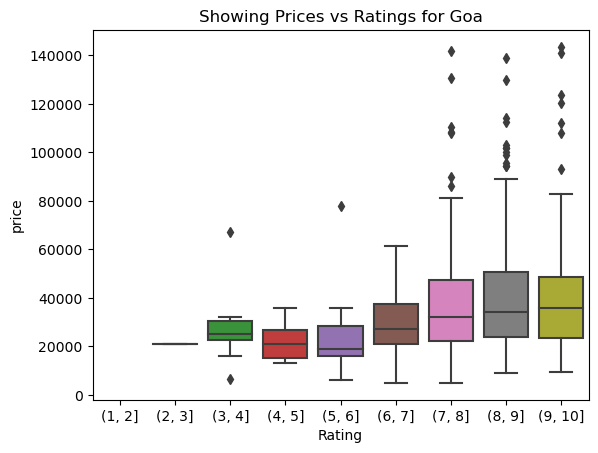

In [41]:
sns.boxplot(data=goa, x=group_data['Rating'], y='price')
plt.title('Showing Prices vs Ratings for Goa')
plt.show()

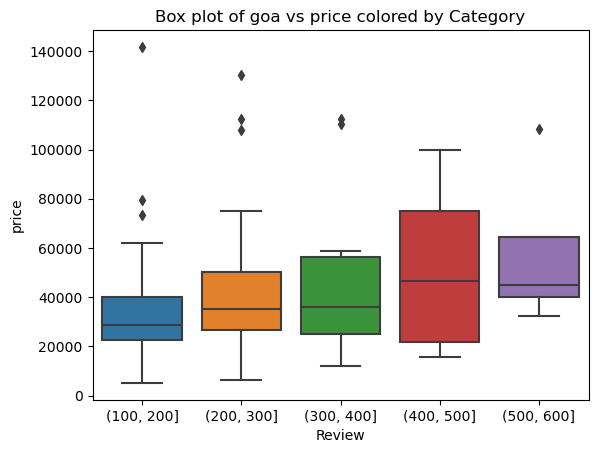

In [42]:
sns.boxplot(data=goa, x=goa_review['Review'], y='price',)
plt.title('Box plot of goa vs price colored by Category')
plt.show()

In [43]:
selected_group = 'Goa'
goa_review = df[df['city'] == selected_group]

bins = [100,200,300,400,500,600]  
# Cutting the values into bins within the selected group
goa_review['Review'] = pd.cut(group_data['reviews'], bins=bins)

print(goa_review)

                                            hotel_name  \
0    Candolim Serenity Resort - Top Rated & Most Aw...   
1    Hotel Golden Rice Sarenity With Swimming Pool,...   
3                               La Vera Boutique Hotel   
4    The Golden Wings Resort, Goa - Property of the...   
5         Hotel Shivam INN - 1 km from calangute Beach   
..                                                 ...   
771                                Wotel Calangute Goa   
774                      R N Guest House (Arambol Goa)   
775                               Villa Fatima Comfort   
783                                     AQUALURA HOTEL   
789                                    Iora Baga Beach   

                   location  \
0                   Old Goa   
1                    Aguada   
3                   Mandrem   
4                    Aguada   
5                     Verla   
..                      ...   
771               Calangute   
774  Arambol beach, Arambol   
775               Calang

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\1441069139.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goa_review['Review'] = pd.cut(group_data['reviews'], bins=bins)


In [44]:
threshold = 150000

df = df[df['price'] <= threshold]

df

,hotel_name,location,features,ratings,reviews,review_title,room_style,price,stay & Capacity,city,stay,capacity,cancellation_policy,pre_payment,breakfast_included,beds,rooms
0,Candolim Serenity Resort - Top Rated & Most Aw...,Old Goa,Double Room1 double bedFree cancellationNo pre...,7.4,12.0,Good,Double Room,39060,"3 nights, 2 adults",Goa,3,2,Yes,No,No,one double bed,two bedrooms
1,"Hotel Golden Rice Sarenity With Swimming Pool,...",Aguada,Deluxe Room1 double bedFree cancellation,6.7,55.0,Good,Deluxe Room,47811,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room
3,La Vera Boutique Hotel,Mandrem,Standard King Room1 extra-large double bedFree...,8.0,218.0,Very good,Standard King Room,37725,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one extra-large double bed,King Room
4,"The Golden Wings Resort, Goa - Property of the...",Aguada,Deluxe Room1 double bedFree cancellationOnly 3...,6.1,7.0,Good,Deluxe Room,40497,"3 nights, 2 adults",Goa,3,2,Yes,Yes,No,one double bed,Deluxe Room
5,Hotel Shivam INN - 1 km from calangute Beach,Verla,King Room1 double bedFree cancellationNo prepa...,10.0,3.0,Exceptional,King Room,22498,"3 nights, 2 adults",Goa,3,2,Yes,No,No,one double bed,King Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,Bellani Villa Maya,Pondicherry,King SuitePrivate suite 1 bedroom 1 living r...,9.0,1.0,Superb,King Suite,45000,"3 nights, 2 adults",Pondicherry,3,2,Yes,No,No,one extra-large double bed,one bedroom
2252,Jai wings,Pondicherry,Deluxe Room1 extra-large double bedOnly 4 room...,4.8,5.0,Good,Deluxe Room,18900,"3 nights, 2 adults",Pondicherry,3,2,No,Yes,No,one extra-large double bed,Deluxe Room
2253,Garrisson Stays,Pondicherry,Deluxe Double Room1 large double bedFree cance...,6.2,5.0,Good,Deluxe Double Room,22497,"3 nights, 2 adults",Pondicherry,3,2,Yes,No,No,one large double bed,two bedrooms
2258,Arunik Inn,"Heritage Town, Pondicherry",Deluxe Double Room1 large double bedFree cance...,2.0,1.0,Good,Deluxe Double Room,37000,"3 nights, 2 adults",Pondicherry,3,2,Yes,No,No,one large double bed,two bedrooms


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


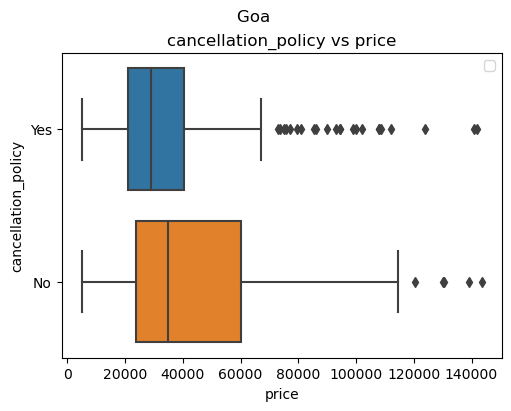

In [45]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Goa ")

axs.set_title("cancellation_policy vs price")
sns.boxplot(data=df.loc[df['city']== 'Goa'], x='price', y ='cancellation_policy', ax=axs)
axs.legend()

plt.show()

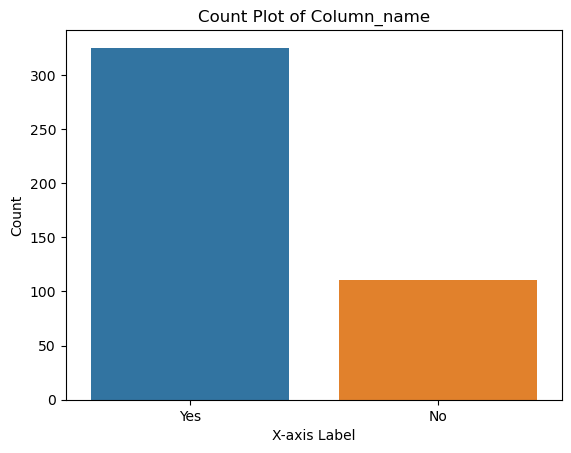

In [46]:
sns.countplot(data=df.loc[df['city']=='Goa'], x='cancellation_policy')
plt.title('Count Plot of Column_name')
plt.xlabel('X-axis Label')
plt.ylabel('Count')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


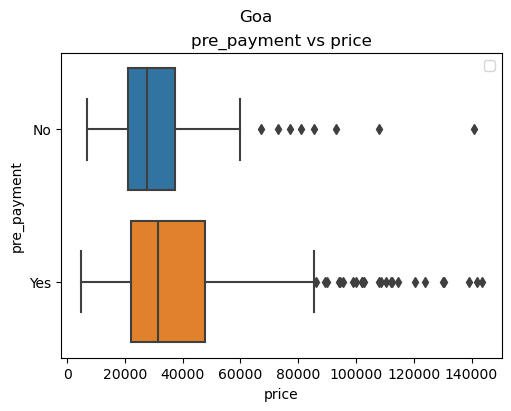

In [47]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Goa")

axs.set_title("pre_payment vs price")
sns.boxplot(data=df.loc[df['city']== 'Goa'], x='price', y ='pre_payment', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


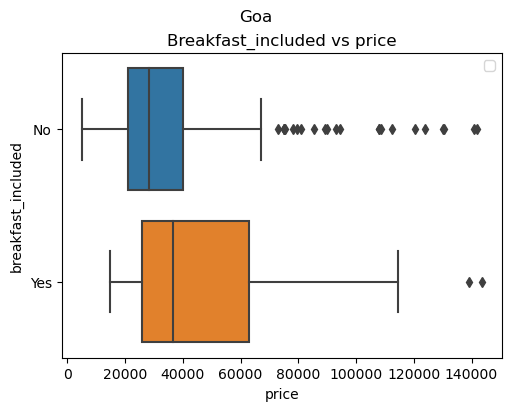

In [48]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Goa")

axs.set_title("Breakfast_included vs price")
sns.boxplot(data=df.loc[df['city']== 'Goa'], x='price', y ='breakfast_included', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


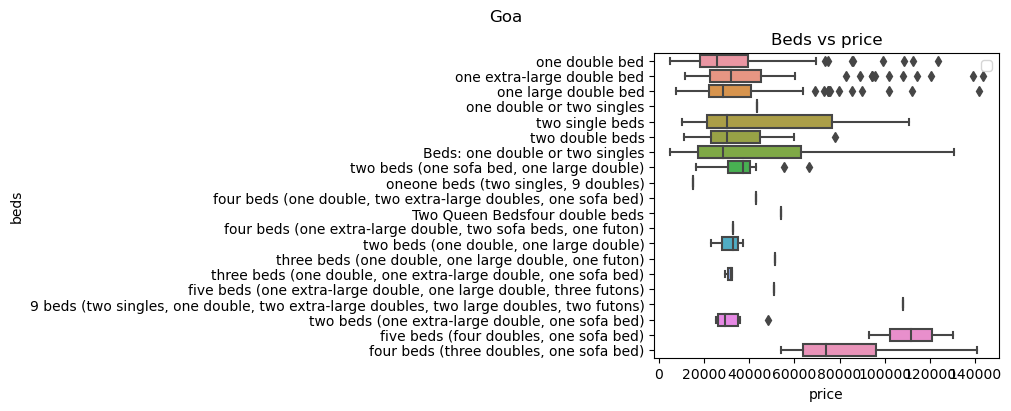

In [49]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Goa")

axs.set_title("Beds vs price")
sns.boxplot(data=df.loc[df['city']== 'Goa'], x='price', y ='beds', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


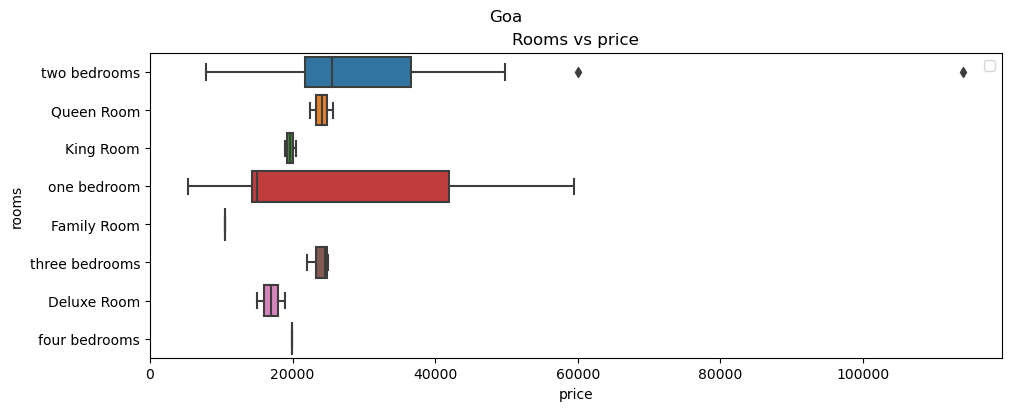

In [50]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Goa")

axs.set_title("Rooms vs price")
sns.boxplot(data=df.loc[df['city']== 'Pondicherry'], x='price', y ='rooms', ax=axs)
axs.legend()

plt.show()

### Manali

In [51]:
selected_group = 'Manali'
manali_data = df[df['city'] == selected_group]

bins = [1,2,3,4,5,6,7,8,9,10]  
# Cutting the values into bins within the selected group
manali_data['Rating'] = pd.cut(manali_data['ratings'], bins=bins)

print(manali_data)

                                             hotel_name            location  \
1163                              Hotel New Meadows inn  New Manali, Manali   
1164                     Manali Castle - Hotel & Resort        Aleo, Manali   
1165                               Hotel Nirmal Cottage              Manali   
1166  Hotel Hilltop At Mall Road Manali With Open Te...  New Manali, Manali   
1167  Bentenwood Resort - A Beutiful Scenic Mountain...              Manali   
...                                                 ...                 ...   
1572                           Heritage Satikva Resorts              Manali   
1573                       OYO Flagship 81115 Nalwa Inn              Manali   
1578                               The Wanderlust Hotel              Manali   
1582                                   The Breaking Bag              Manali   
1583               Vistas Hostel - Near Mall Road & Gym              Manali   

                                               feat

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2372972347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manali_data['Rating'] = pd.cut(manali_data['ratings'], bins=bins)


In [52]:
selected_group = 'Manali'
manali_review = df[df['city'] == selected_group]

bins = [100,200,300,400,500,600]  
# Cutting the values into bins within the selected group
manali_review['Review'] = pd.cut(manali_review['reviews'], bins=bins)

print(goa_review)

                                            hotel_name  \
0    Candolim Serenity Resort - Top Rated & Most Aw...   
1    Hotel Golden Rice Sarenity With Swimming Pool,...   
3                               La Vera Boutique Hotel   
4    The Golden Wings Resort, Goa - Property of the...   
5         Hotel Shivam INN - 1 km from calangute Beach   
..                                                 ...   
771                                Wotel Calangute Goa   
774                      R N Guest House (Arambol Goa)   
775                               Villa Fatima Comfort   
783                                     AQUALURA HOTEL   
789                                    Iora Baga Beach   

                   location  \
0                   Old Goa   
1                    Aguada   
3                   Mandrem   
4                    Aguada   
5                     Verla   
..                      ...   
771               Calangute   
774  Arambol beach, Arambol   
775               Calang

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2631522979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manali_review['Review'] = pd.cut(manali_review['reviews'], bins=bins)


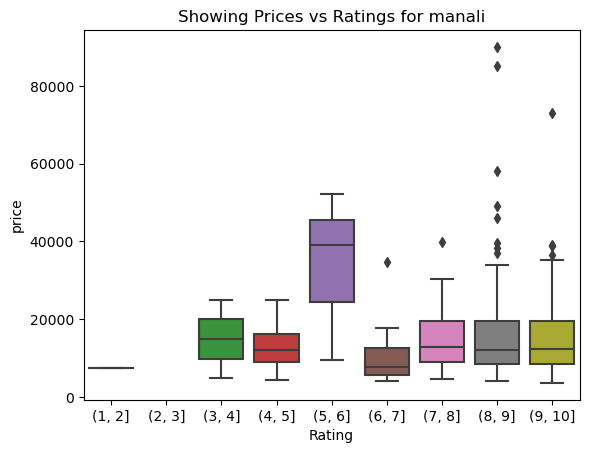

In [53]:

sns.boxplot(data=manali, x=manali_data['Rating'], y='price')
plt.title('Showing Prices vs Ratings for manali')
plt.show()

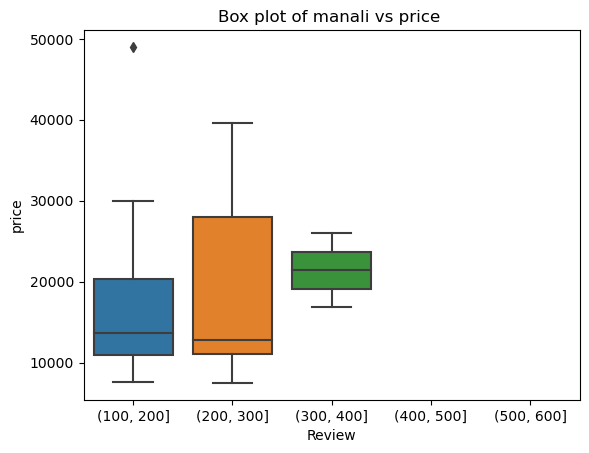

In [54]:
sns.boxplot(data=manali, x=manali_review['Review'], y='price',)
plt.title('Box plot of manali vs price ')
plt.show()

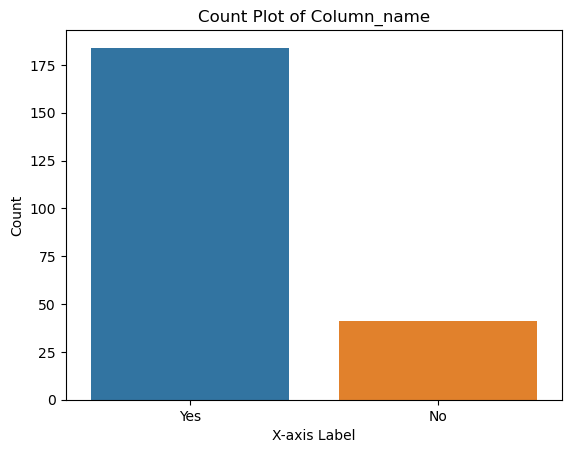

In [55]:
sns.countplot(data=df.loc[df['city']=='Manali'], x='cancellation_policy')
plt.title('Count Plot of Column_name')
plt.xlabel('X-axis Label')
plt.ylabel('Count')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


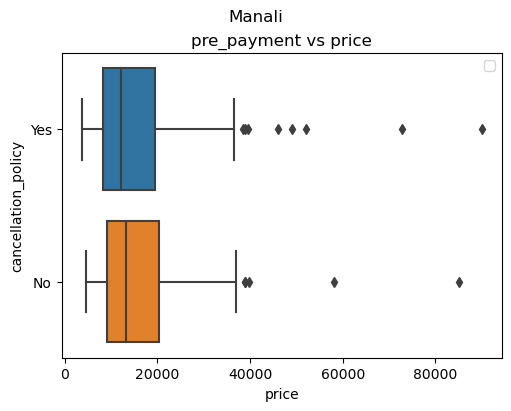

In [56]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Manali")

axs.set_title("pre_payment vs price")
sns.boxplot(data=df.loc[df['city']== 'Manali'], x='price', y ='cancellation_policy', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


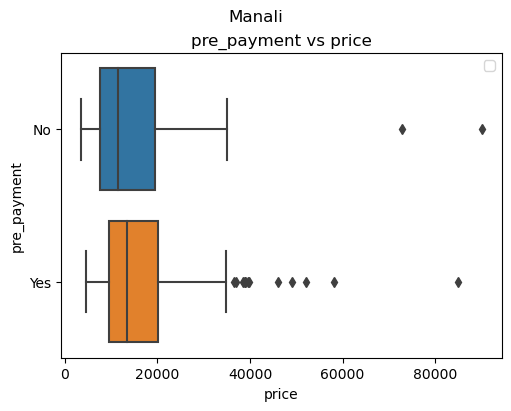

In [57]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Manali")

axs.set_title("pre_payment vs price")
sns.boxplot(data=df.loc[df['city']== 'Manali'], x='price', y ='pre_payment', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


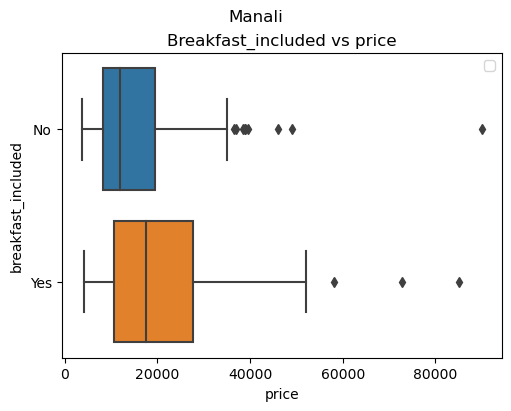

In [58]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Manali")

axs.set_title("Breakfast_included vs price")
sns.boxplot(data=df.loc[df['city']== 'Manali'], x='price', y ='breakfast_included', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


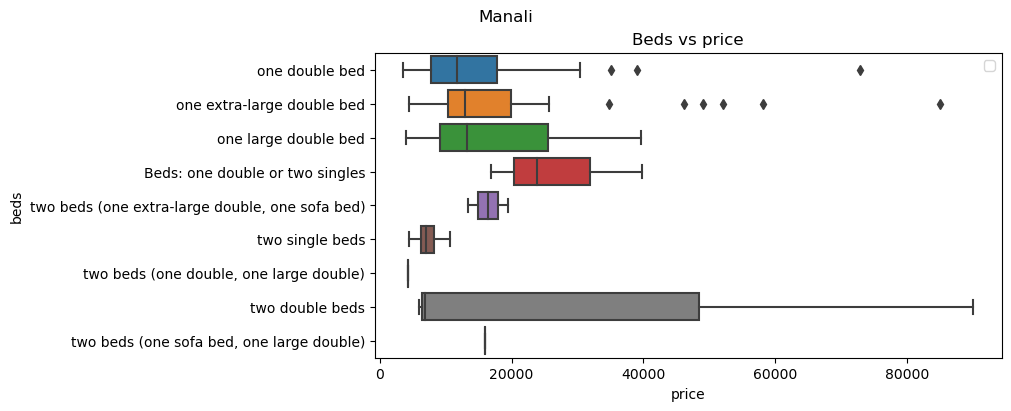

In [59]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Manali")

axs.set_title("Beds vs price")
sns.boxplot(data=df.loc[df['city']== 'Manali'], x='price', y ='beds', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


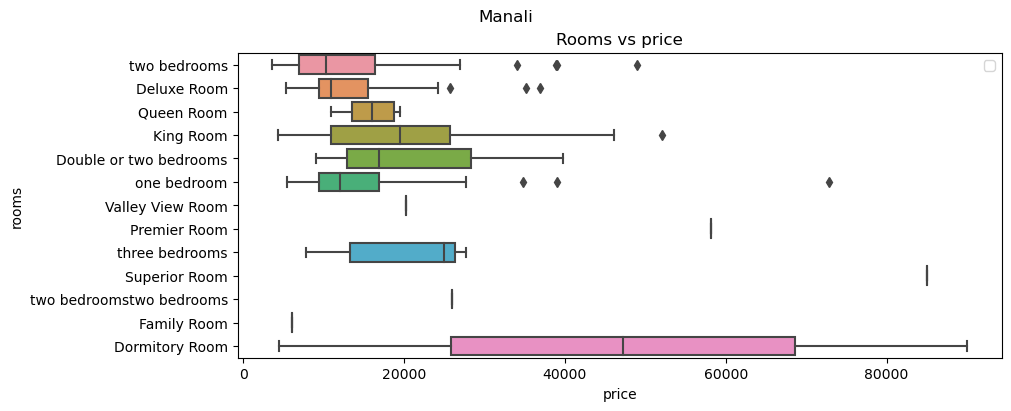

In [60]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Manali")

axs.set_title("Rooms vs price")
sns.boxplot(data=df.loc[df['city']== 'Manali'], x='price', y ='rooms', ax=axs)
axs.legend()

plt.show()

### Mumbai

In [61]:
selected_group = 'Mumbai'
mumbai_data = df[df['city'] == selected_group]

bins = [1,2,3,4,5,6,7,8,9,10]  
# Cutting the values into bins within the selected group
mumbai_data['Rating'] = pd.cut(mumbai_data['ratings'], bins=bins)

print(mumbai_data)

                                             hotel_name  \
1584                               Trident Bandra Kurla   
1585             Country Inn By Turtle Hotel and Resort   
1586                     Country Inn & Suites By Turtle   
1587                                Country Inn by UMRB   
1588  Holiday Inn Mumbai International Airport, an I...   
...                                                 ...   
2127                             CABIN STAY-SOCIAL HUBZ   
2128                                   Ruby Guest House   
2129                                Bapuji Paying Guest   
2132                                   Subway Dormitory   
2134                            Mayura Aureole CoLiving   

                     location  \
1584           Bandra, Mumbai   
1585  Western Suburbs, Mumbai   
1586  Western Suburbs, Mumbai   
1587  Western Suburbs, Mumbai   
1588  Western Suburbs, Mumbai   
...                       ...   
2127  Western Suburbs, Mumbai   
2128     South Mumbai, Mumb

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\1654481903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_data['Rating'] = pd.cut(mumbai_data['ratings'], bins=bins)


In [62]:
selected_group = 'Mumbai'
mumbai_review = df[df['city'] == selected_group]

bins = [100,200,300,400,500,600]  
# Cutting the values into bins within the selected group
mumbai_review['Review'] = pd.cut(mumbai_review['reviews'], bins=bins)

print(mumbai_review)

                                             hotel_name  \
1584                               Trident Bandra Kurla   
1585             Country Inn By Turtle Hotel and Resort   
1586                     Country Inn & Suites By Turtle   
1587                                Country Inn by UMRB   
1588  Holiday Inn Mumbai International Airport, an I...   
...                                                 ...   
2127                             CABIN STAY-SOCIAL HUBZ   
2128                                   Ruby Guest House   
2129                                Bapuji Paying Guest   
2132                                   Subway Dormitory   
2134                            Mayura Aureole CoLiving   

                     location  \
1584           Bandra, Mumbai   
1585  Western Suburbs, Mumbai   
1586  Western Suburbs, Mumbai   
1587  Western Suburbs, Mumbai   
1588  Western Suburbs, Mumbai   
...                       ...   
2127  Western Suburbs, Mumbai   
2128     South Mumbai, Mumb

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\623753809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_review['Review'] = pd.cut(mumbai_review['reviews'], bins=bins)


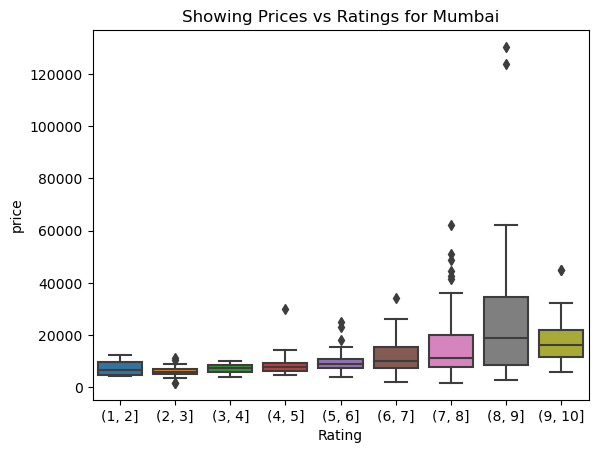

In [63]:
sns.boxplot(data=mumbai, x=mumbai_data['Rating'], y='price')
plt.title('Showing Prices vs Ratings for Mumbai')
plt.show()

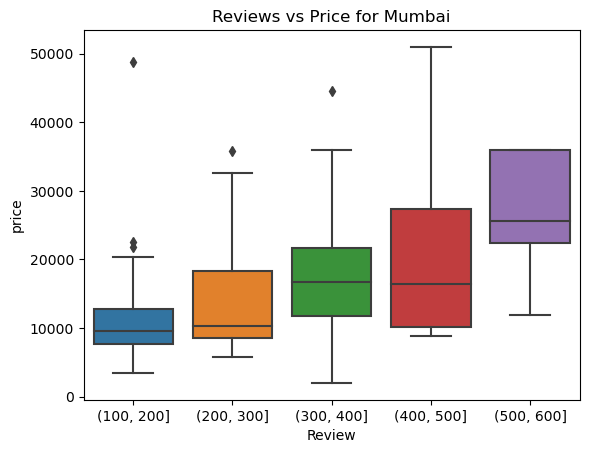

In [64]:
sns.boxplot(data=mumbai, x=mumbai_review['Review'], y='price',)
plt.title('Reviews vs Price for Mumbai')
plt.show()

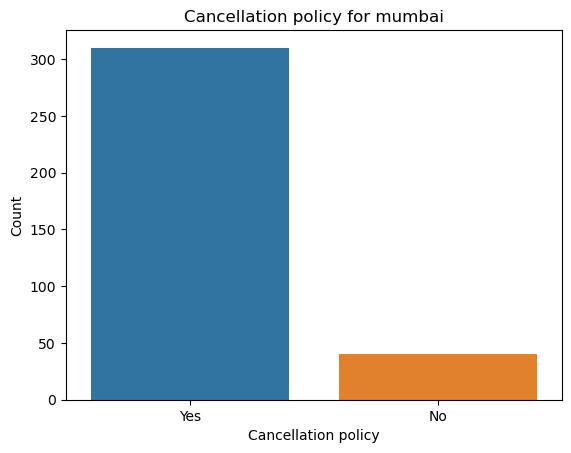

In [65]:
sns.countplot(data=df.loc[df['city']=='Mumbai'], x='cancellation_policy')
plt.title('Cancellation policy for mumbai')
plt.xlabel('Cancellation policy')
plt.ylabel('Count')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


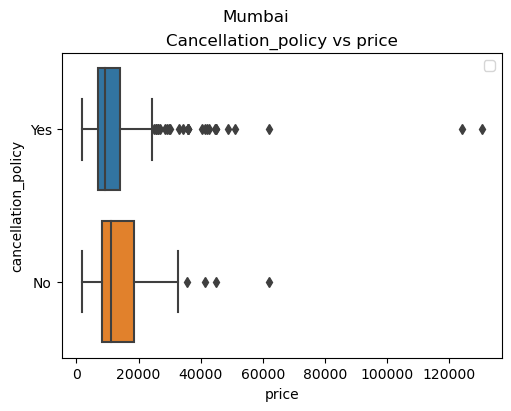

In [66]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Mumbai")

axs.set_title("Cancellation_policy vs price")
sns.boxplot(data=df.loc[df['city']== 'Mumbai'], x='price', y ='cancellation_policy', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


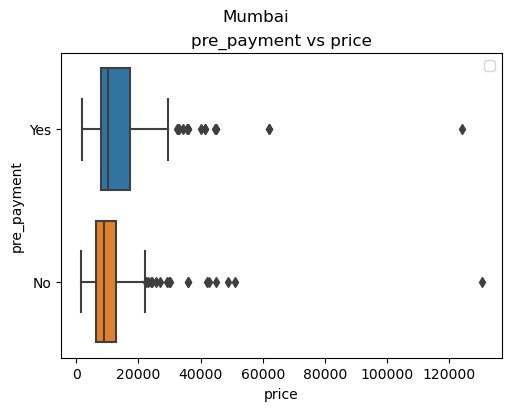

In [67]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Mumbai")

axs.set_title("pre_payment vs price")
sns.boxplot(data=df.loc[df['city']== 'Mumbai'], x='price', y ='pre_payment', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


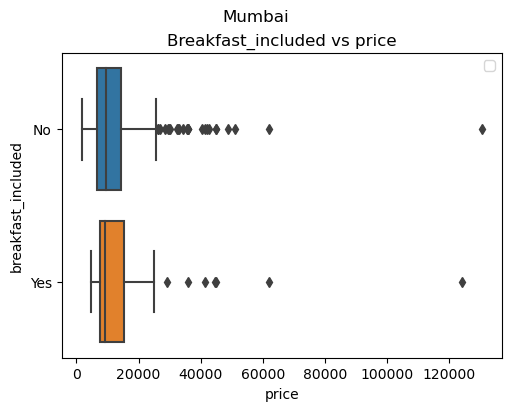

In [68]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Mumbai")

axs.set_title("Breakfast_included vs price")
sns.boxplot(data=df.loc[df['city']== 'Mumbai'], x='price', y ='breakfast_included', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


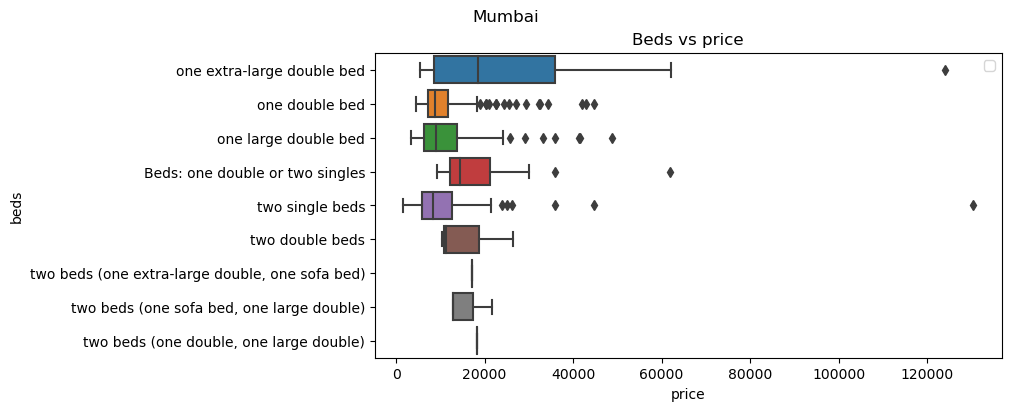

In [69]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Mumbai")

axs.set_title("Beds vs price")
sns.boxplot(data=df.loc[df['city']== 'Mumbai'], x='price', y ='beds', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


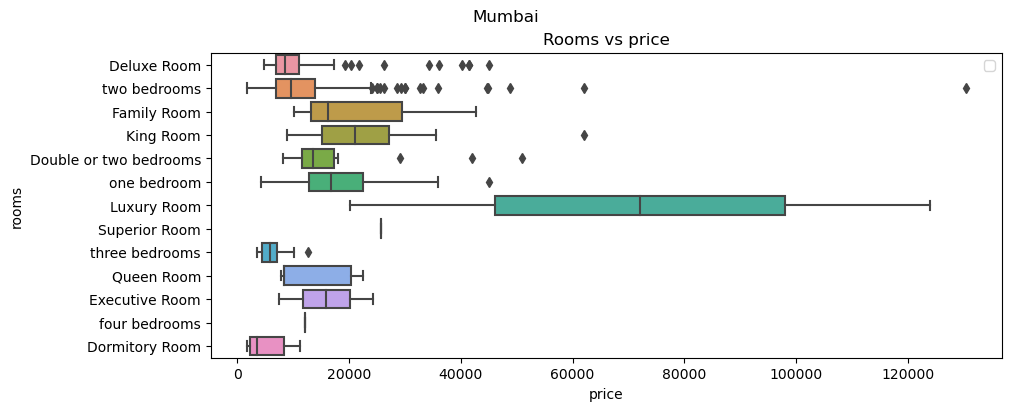

In [70]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Mumbai")

axs.set_title("Rooms vs price")
sns.boxplot(data=df.loc[df['city']== 'Mumbai'], x='price', y ='rooms', ax=axs)
axs.legend()

plt.show()

### Kolkata

In [71]:
selected_group = 'Kolkata'
kolkata_data = df[df['city'] == selected_group]

kolkata = [1,2,3,4,5,6,7,8,9,10]  
# Cutting the values into bins within the selected group
kolkata_data['Rating'] = pd.cut(kolkata_data['ratings'], bins=bins)

print(kolkata_data)

                            hotel_name             location  \
791     FabHotel Sayeeda International  Ballygunge, Kolkata   
792    FabHotel Stay Inn International              Kolkata   
793   Olive Service Apartments NewTown    New Town, Kolkata   
794         FabHotel The Hastings Club              Kolkata   
795              Hyatt Regency Kolkata   Salt Lake, Kolkata   
...                                ...                  ...   
1150                     Nk7 Lake Town              Kolkata   
1151         OYO Flagship Hotel Omaira              Kolkata   
1152        Hotel Sawood International              Kolkata   
1155                    The Kei Suites              Kolkata   
1160               FabHotel Royal Palm    New Town, Kolkata   

                                               features  ratings  reviews  \
791            Deluxe Room1 double bedFree cancellation      7.9      7.0   
792   Deluxe Room1 double bedFree cancellationOnly 4...      8.0     41.0   
793   Execut

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\667754893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kolkata_data['Rating'] = pd.cut(kolkata_data['ratings'], bins=bins)


In [72]:
selected_group = 'Kolkata'
kolkata_review = df[df['city'] == selected_group]

bins = [100,200,300,400,500,600]  
# Cutting the values into bins within the selected group
kolkata_review['Review'] = pd.cut(kolkata_data['reviews'], bins=bins)

print(kolkata_review)

                            hotel_name             location  \
791     FabHotel Sayeeda International  Ballygunge, Kolkata   
792    FabHotel Stay Inn International              Kolkata   
793   Olive Service Apartments NewTown    New Town, Kolkata   
794         FabHotel The Hastings Club              Kolkata   
795              Hyatt Regency Kolkata   Salt Lake, Kolkata   
...                                ...                  ...   
1150                     Nk7 Lake Town              Kolkata   
1151         OYO Flagship Hotel Omaira              Kolkata   
1152        Hotel Sawood International              Kolkata   
1155                    The Kei Suites              Kolkata   
1160               FabHotel Royal Palm    New Town, Kolkata   

                                               features  ratings  reviews  \
791            Deluxe Room1 double bedFree cancellation      7.9      7.0   
792   Deluxe Room1 double bedFree cancellationOnly 4...      8.0     41.0   
793   Execut

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2717286307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kolkata_review['Review'] = pd.cut(kolkata_data['reviews'], bins=bins)


In [73]:
sns.boxplot(data=kolkata, x=kolkata_data['Rating'], y='price')
plt.title('Showing Prices vs Ratings for Kolkata')
plt.show()

AttributeError: 'list' object has no attribute 'get'

In [ ]:
sns.boxplot(data=kolkata, x=kolkata_review['Review'], y='price',)
plt.title('Box plot of kolkata vs price')
plt.show()

In [ ]:
sns.countplot(data=df.loc[df['city']=='Kolkata'], x='cancellation_policy')
plt.title('Cancellation policy for Kolkata')
plt.xlabel('Cancellation policy')
plt.ylabel('Count')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Kolkata")

axs.set_title("Cancellation_policy vs price")
sns.boxplot(data=df.loc[df['city']== 'Kolkata'], x='price', y ='cancellation_policy', ax=axs)
axs.legend()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Kolkata")

axs.set_title("pre_payment vs price")
sns.boxplot(data=df.loc[df['city']== 'Kolkata'], x='price', y ='pre_payment', ax=axs)
axs.legend()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Kolkata")

axs.set_title("Breakfast_included vs price")
sns.boxplot(data=df.loc[df['city']== 'Kolkata'], x='price', y ='breakfast_included', ax=axs)
axs.legend()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Kolkata")

axs.set_title("Beds vs price")
sns.boxplot(data=df.loc[df['city']== 'Kolkata'], x='price', y ='beds', ax=axs)
axs.legend()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Kolkata")

axs.set_title("Rooms vs price")
sns.boxplot(data=df.loc[df['city']== 'Kolkata'], x='price', y ='rooms', ax=axs)
axs.legend()

plt.show()

### Pondicherry

In [74]:
selected_group = 'Pondicherry'
pondicherry_data = df[df['city'] == selected_group]

bins = [1,2,3,4,5,6,7,8,9,10]  
# Cutting the values into bins within the selected group
pondicherry_data['Rating'] = pd.cut(pondicherry_data['ratings'], bins=bins)

print(pondicherry_data)

                                             hotel_name  \
2142                                   Dune de L'orient   
2145                               Pranaav Beach Resort   
2149                              White Pearl Residency   
2151  Deer Suites - Rock Beach White Town Zone , Fre...   
2153                                  Sri Balaji Villas   
2154                               Seasons4 guest house   
2155         Sky blue fully furnished 1bhk at 1st floor   
2157                                    Sinnas Homestay   
2159                                Shivam Luxury Villa   
2160                                      Hotel Vi Park   
2161                                        Villa Meena   
2164                                  Accord Puducherry   
2165                                 Sizzling Inn Pondy   
2167                             Treebo Trend Eden Park   
2170                      Itsy By Treebo - Green Villaa   
2171                                         Stay@Villa 

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\391968591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pondicherry_data['Rating'] = pd.cut(pondicherry_data['ratings'], bins=bins)


In [75]:
selected_group = 'Pondicherry'
pondicherry_review = df[df['city'] == selected_group]

bins = [100,200,300,400,500,600]  
# Cutting the values into bins within the selected group
pondicherry_review['Review'] = pd.cut(pondicherry_review['reviews'], bins=bins)

print(pondicherry_review)

                                             hotel_name  \
2142                                   Dune de L'orient   
2145                               Pranaav Beach Resort   
2149                              White Pearl Residency   
2151  Deer Suites - Rock Beach White Town Zone , Fre...   
2153                                  Sri Balaji Villas   
2154                               Seasons4 guest house   
2155         Sky blue fully furnished 1bhk at 1st floor   
2157                                    Sinnas Homestay   
2159                                Shivam Luxury Villa   
2160                                      Hotel Vi Park   
2161                                        Villa Meena   
2164                                  Accord Puducherry   
2165                                 Sizzling Inn Pondy   
2167                             Treebo Trend Eden Park   
2170                      Itsy By Treebo - Green Villaa   
2171                                         Stay@Villa 

C:\Users\srujan\AppData\Local\Temp\ipykernel_15252\2871642653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pondicherry_review['Review'] = pd.cut(pondicherry_review['reviews'], bins=bins)


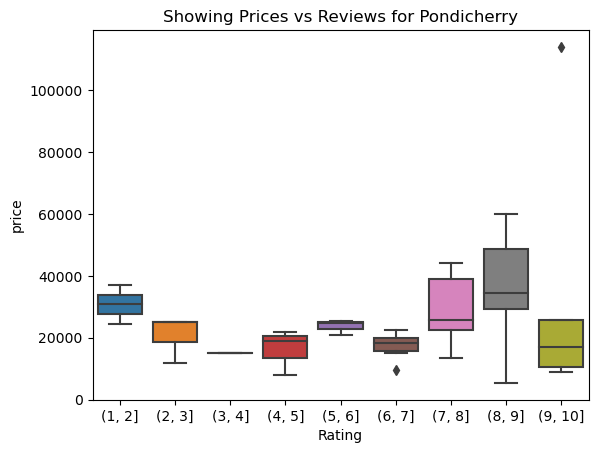

In [76]:
sns.boxplot(data=pondicherry, x=pondicherry_data['Rating'], y='price')
plt.title('Showing Prices vs Reviews for Pondicherry')
plt.show()

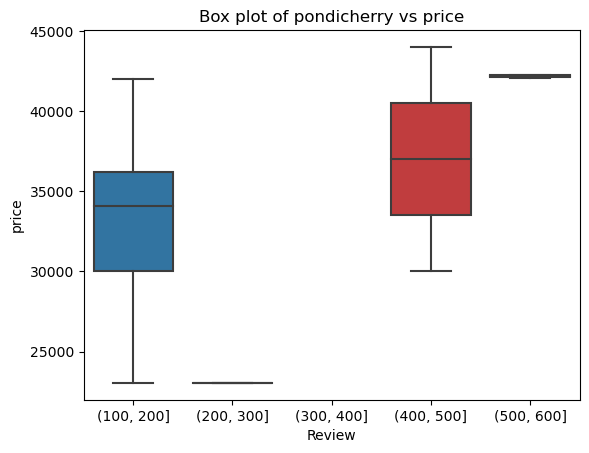

In [77]:
sns.boxplot(data=pondicherry, x=pondicherry_review['Review'], y='price',)
plt.title('Box plot of pondicherry vs price')
plt.show()

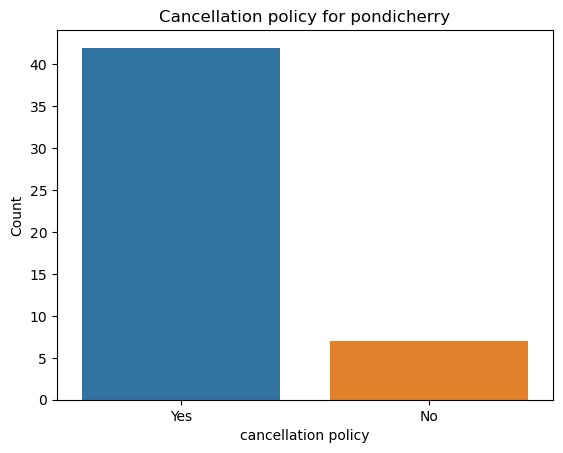

In [78]:
sns.countplot(data=df.loc[df['city']=='Pondicherry'], x='cancellation_policy')
plt.title('Cancellation policy for pondicherry')
plt.xlabel('cancellation policy')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret input 'Cancellation_policy'

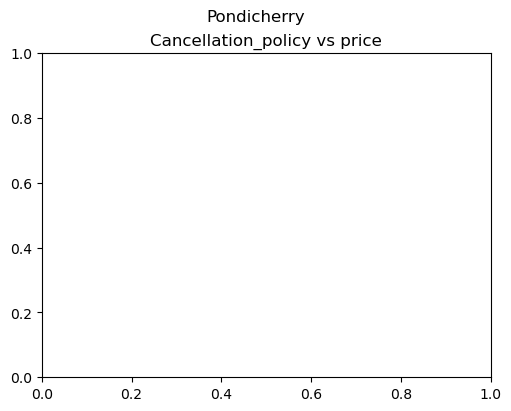

In [79]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Pondicherry")

axs.set_title("Cancellation_policy vs price")
sns.boxplot(data=df.loc[df['city']== 'Pondicherry'], x='price', y ='Cancellation_policy', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


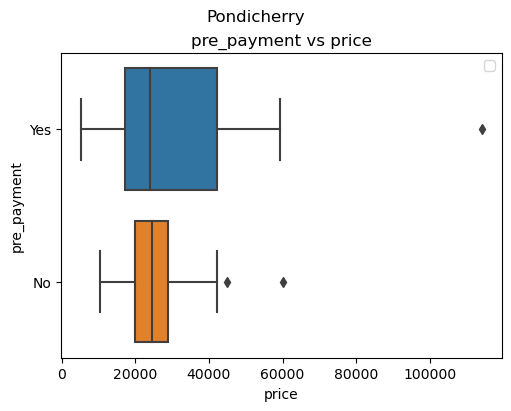

In [80]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Pondicherry")

axs.set_title("pre_payment vs price")
sns.boxplot(data=df.loc[df['city']== 'Pondicherry'], x='price', y ='pre_payment', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


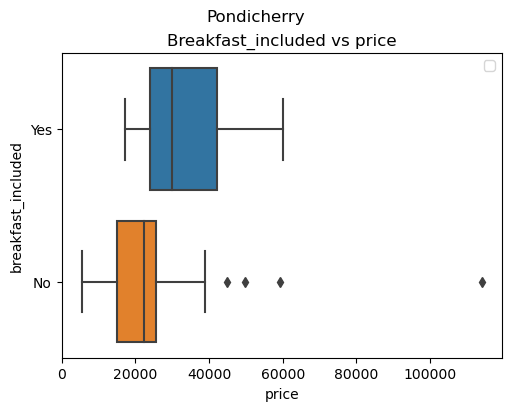

In [81]:
fig, axs = plt.subplots(1, figsize=(5,4), constrained_layout=True)
fig.suptitle("Pondicherry")

axs.set_title("Breakfast_included vs price")
sns.boxplot(data=df.loc[df['city']== 'Pondicherry'], x='price', y ='breakfast_included', ax=axs)
axs.legend()

plt.show()

In [82]:
df.columns

Index(['hotel_name', 'location', 'features', 'ratings', 'reviews',
       'review_title', 'room_style', 'price', 'stay & Capacity', 'city',
       'stay', 'capacity', 'cancellation_policy', 'pre_payment',
       'breakfast_included', 'beds', 'rooms'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


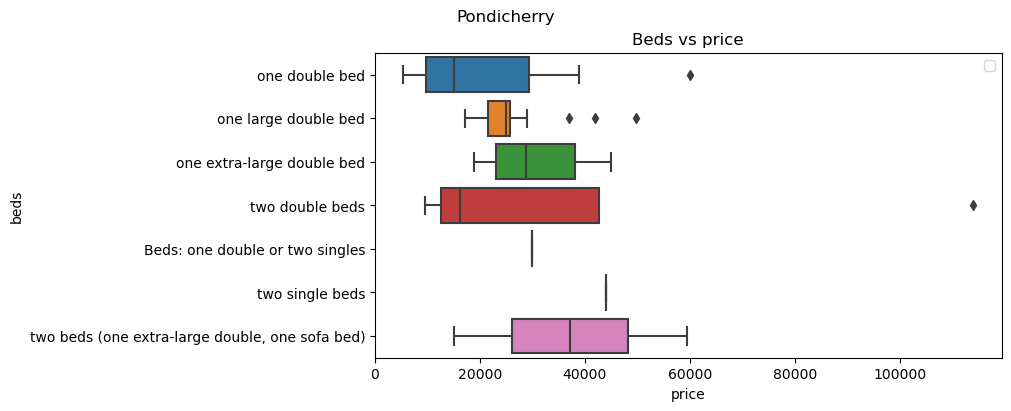

In [83]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Pondicherry")

axs.set_title("Beds vs price")
sns.boxplot(data=df.loc[df['city']== 'Pondicherry'], x='price', y ='beds', ax=axs)
axs.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


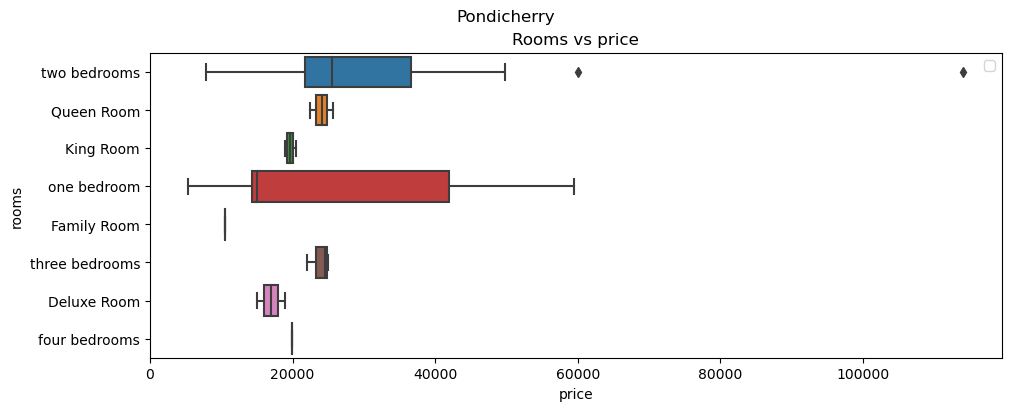

In [84]:
fig, axs = plt.subplots(1, figsize=(10,4), constrained_layout=True)
fig.suptitle("Pondicherry")

axs.set_title("Rooms vs price")
sns.boxplot(data=df.loc[df['city']== 'Pondicherry'], x='price', y ='rooms', ax=axs)
axs.legend()

plt.show()

In [85]:
df.location.value_counts()

Western Suburbs, Mumbai    173
Manali                     135
Kolkata                    135
South Mumbai, Mumbai        46
Calangute                   40
                          ... 
Betalbatim                   1
Nerul                        1
Vagator Beach, Vagator       1
Sangolda                     1
Tiracol                      1
Name: location, Length: 106, dtype: int64

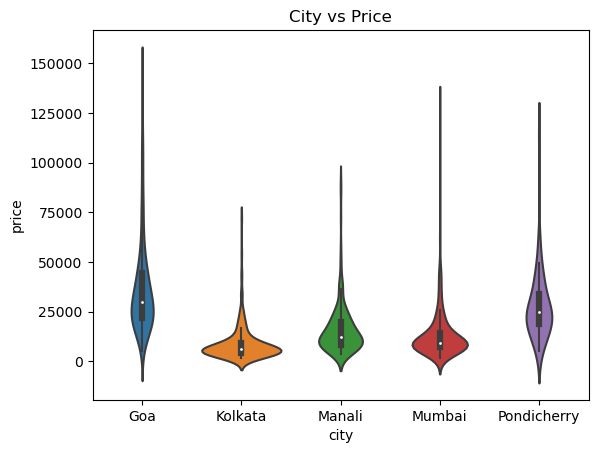

In [86]:
# State vs Price

sns.violinplot(data=df, x='city', y='price')
plt.title('City vs Price')
plt.show()

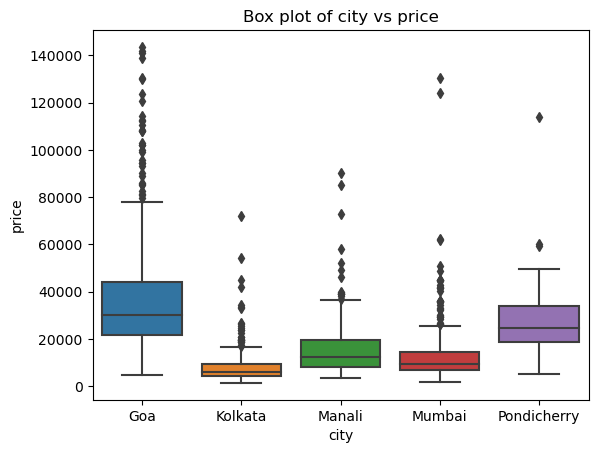

In [87]:
# state vs rating

sns.boxplot(data=df, x='city', y='price')
plt.title('Box plot of city vs price')
plt.show()

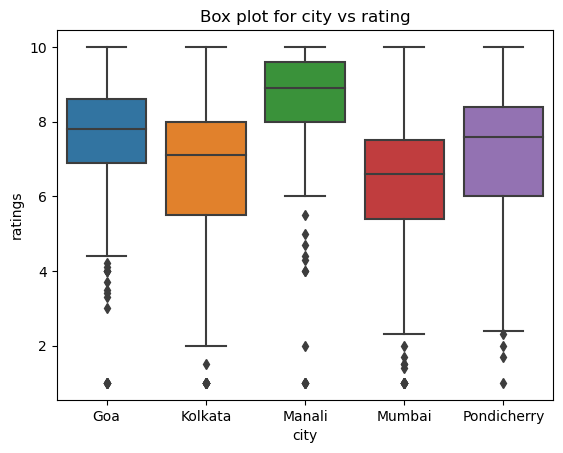

In [88]:

sns.boxplot(data=df, x='city', y='ratings')
plt.title('Box plot for city vs rating')
plt.show()

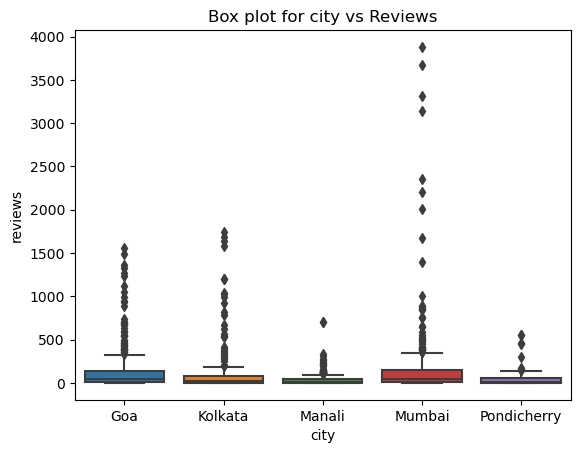

In [89]:
sns.boxplot(data=df, x='city', y='reviews')
plt.title('Box plot for city vs Reviews')
plt.show()

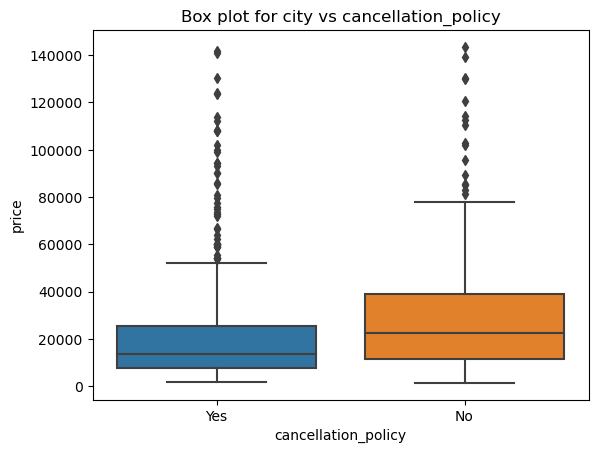

In [90]:
sns.boxplot(data=df, x='cancellation_policy',y='price')
plt.title('Box plot for city vs cancellation_policy')
plt.show()


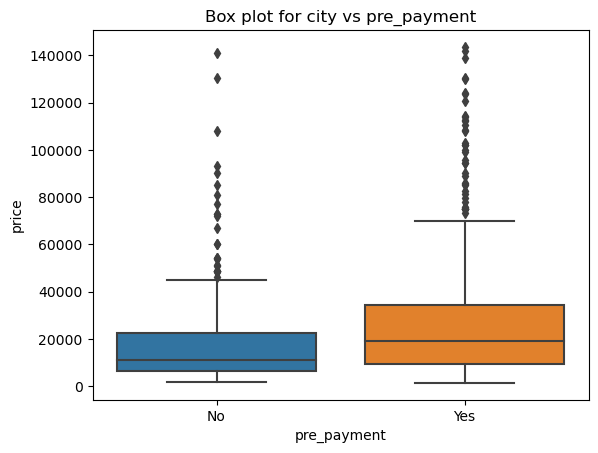

In [91]:
sns.boxplot(data=df, x='pre_payment',y='price')
plt.title('Box plot for city vs pre_payment')
plt.show()


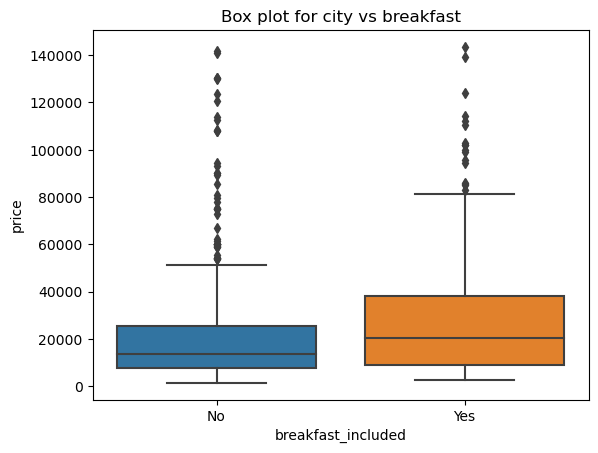

In [92]:
sns.boxplot(data=df, x='breakfast_included',y='price')
plt.title('Box plot for city vs breakfast')
plt.show()
